In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score 
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset and examine its structure
data = pd.read_csv("day.csv")
data.head()
data.info()

# Convert 'dteday' column from object to datetime format
data["dteday"] = pd.to_datetime(data["dteday"])

# Verify changes and inspect the top rows
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Drop unnecessary columns and keep only relevant features
data.drop(columns=["casual", "registered", "instant", "dteday"], inplace=True)
data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


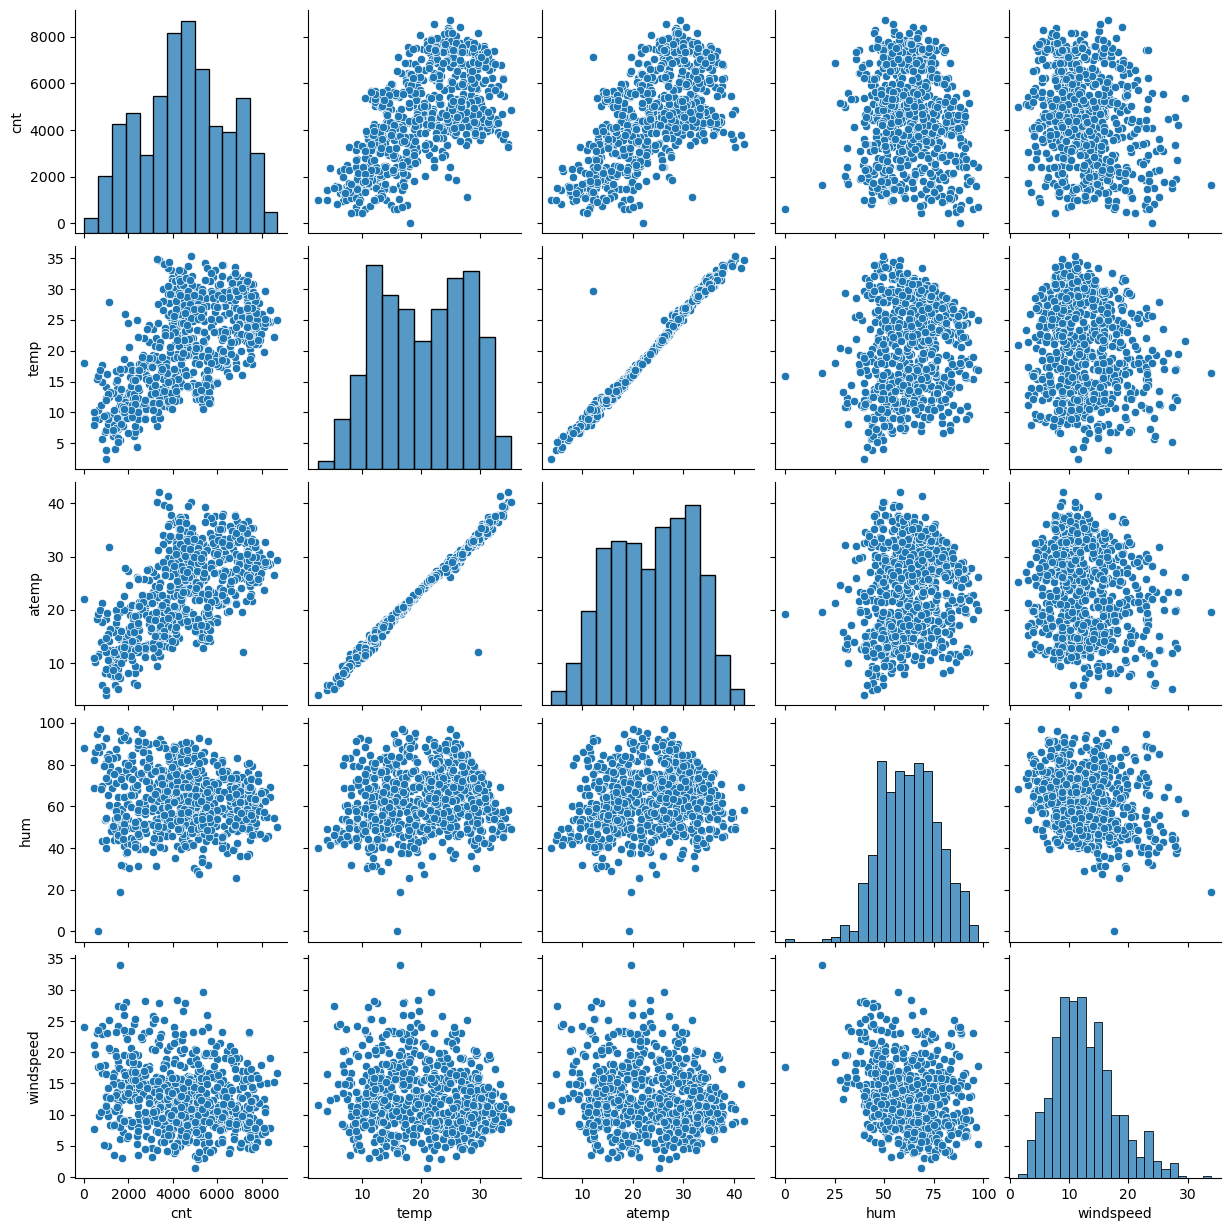

In [4]:
# Visualize relationships between continuous variables
continuous_features = ["cnt", "temp", "atemp", "hum", "windspeed"]
sns.pairplot(data[continuous_features])
plt.show()


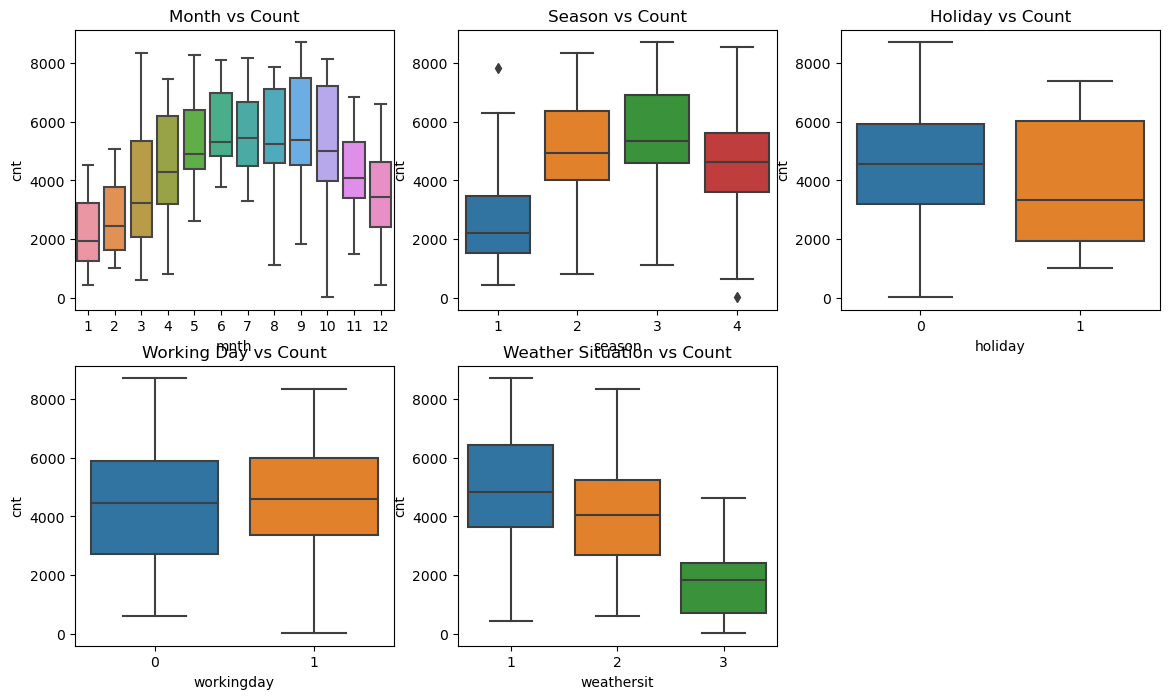

In [5]:
# Use boxplots to analyze categorical variables' effect on 'cnt'
categorical_features = ["cnt", "mnth", "season", "holiday", "workingday", "weathersit"]
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x="mnth", y="cnt", data=data)
plt.title('Month vs Count')

plt.subplot(2, 3, 2)
sns.boxplot(x="season", y="cnt", data=data)
plt.title('Season vs Count')

plt.subplot(2, 3, 3)
sns.boxplot(x="holiday", y="cnt", data=data)
plt.title('Holiday vs Count')

plt.subplot(2, 3, 4)
sns.boxplot(x="workingday", y="cnt", data=data)
plt.title('Working Day vs Count')

plt.subplot(2, 3, 5)
sns.boxplot(x="weathersit", y="cnt", data=data)
plt.title('Weather Situation vs Count')

plt.show()

In [6]:
# Check for unique values in 'weathersit' to ensure accuracy
data["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [7]:
# Convert categorical variables to dummy variables
dummy_vars = ["season", "mnth", "weathersit"]
data = pd.get_dummies(data, columns=dummy_vars, drop_first=True)

In [8]:
# Split data into training and testing sets
train_data, test_data = train_test_split(data, train_size=0.7, random_state=100)
print(train_data.shape)
print(test_data.shape)

(510, 25)
(220, 25)


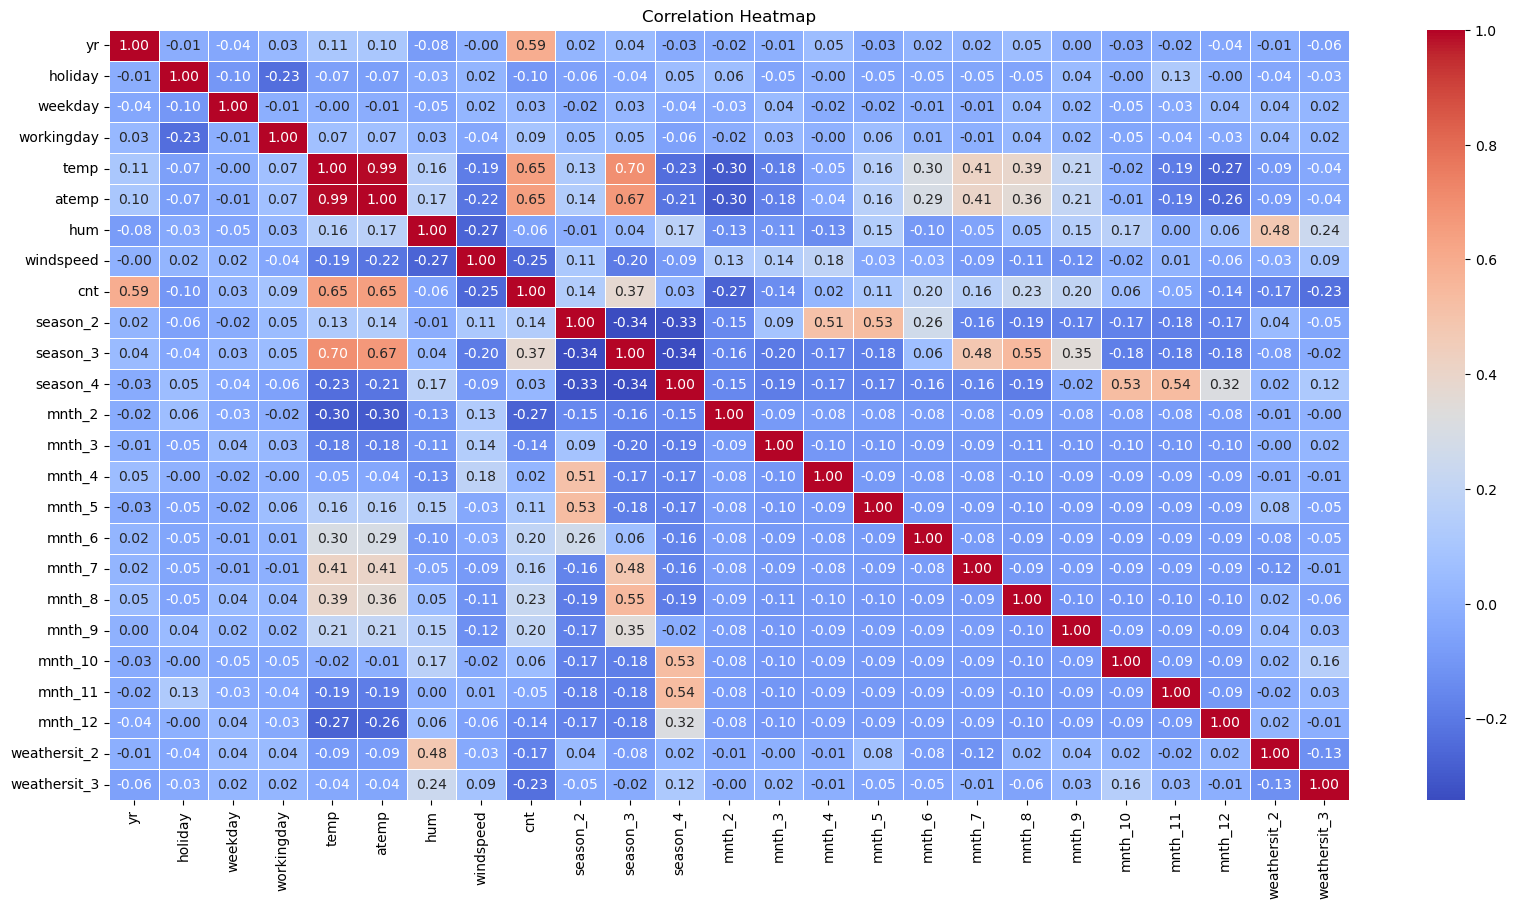

In [9]:
plt.figure(figsize=(20, 10))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Plot the heatmap with 'coolwarm' color map
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Normalize numerical features
scaler = MinMaxScaler()
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed']
train_data[numerical_vars] = scaler.fit_transform(train_data[numerical_vars])

In [11]:
# Define target variable for the training set
target_train = train_data.pop('cnt')
features_train = train_data

In [12]:
# Add constant to features
features_train_sm = sm.add_constant(features_train['atemp'])


In [13]:
# Build and fit the OLS regression model
model = sm.OLS(target_train, features_train_sm)
fitted_model = model.fit()
print(fitted_model.params)
print(fitted_model.summary())

const    1431.848840
atemp    5950.404439
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           4.77e-62
Time:                        20:40:47   Log-Likelihood:                -4448.0
No. Observations:                 510   AIC:                             8900.
Df Residuals:                     508   BIC:                             8909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [14]:
# Update feature set for OLS regression
features_train_sm = features_train[['yr', 'temp', 'holiday', 'workingday', 'hum', 'windspeed', 
                                    'season_2', 'season_3', 'season_4', 'mnth_3', 'mnth_8', 
                                    'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3']]
features_train_sm = sm.add_constant(features_train_sm)

In [15]:
# Create and fit the final model
model = sm.OLS(target_train, features_train_sm)
fitted_model = model.fit()
print(fitted_model.params)
print(fitted_model.summary())


const           1944.288466
yr              1994.099802
temp            4303.040056
holiday         -687.834917
workingday       142.217508
hum            -1487.455858
windspeed      -1598.655191
season_2        1061.474650
season_3         314.668688
season_4        1307.169746
mnth_3           237.274642
mnth_8           435.475451
mnth_9          1039.826453
mnth_10          350.100315
weathersit_2    -479.350889
weathersit_3   -2144.001334
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          6.20e-189
Time:                        20:40:47   Log-Likelihood:                -4111.3
No. Observations:                 510   AIC:                   

In [16]:
# Perform Variance Inflation Factor (VIF) analysis to check multicollinearity
vif_data = pd.DataFrame()
vif_data['Features'] = features_train_sm.columns
vif_data['VIF'] = [variance_inflation_factor(features_train_sm.values, i) for i in range(features_train_sm.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

        Features    VIF
0          const  49.09
8       season_3   6.29
2           temp   3.72
7       season_2   2.66
9       season_4   2.33
5            hum   1.90
11        mnth_8   1.68
14  weathersit_2   1.56
13       mnth_10   1.51
12        mnth_9   1.40
15  weathersit_3   1.26
6      windspeed   1.20
10        mnth_3   1.17
3        holiday   1.08
4     workingday   1.07
1             yr   1.04


<Axes: ylabel='Count'>

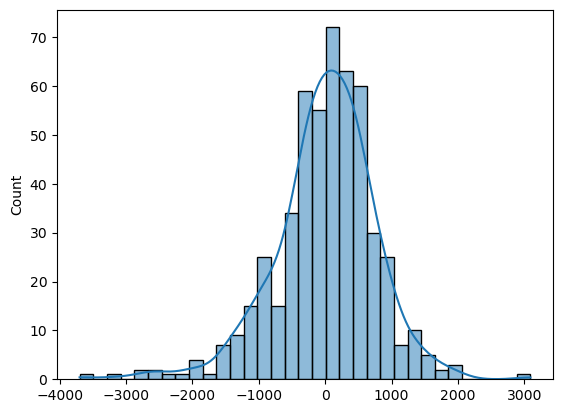

In [17]:
# Residual analysis
predicted_train = fitted_model.predict(features_train_sm)
residuals = target_train - predicted_train
sns.histplot(residuals, kde=True)


In [18]:
# Normalize numerical features in the test dataset
test_data[numerical_vars] = scaler.transform(test_data[numerical_vars])

In [19]:
# Define target variable for the test set
target_test = test_data.pop('cnt')
features_test = test_data


In [22]:
# Add constant to test features
features_test_sm = sm.add_constant(features_test)
features_test_sm = features_test_sm[features_train_sm.columns]


In [23]:
# Predict using the fitted model and evaluate performance on the test set
predicted_test = fitted_model.predict(features_test_sm)
print(f"R-squared score: {r2_score(target_test, predicted_test)}")

R-squared score: 0.8202383526753301
